In [1]:
# QUIZ
#
# Determine the step size h so that after 
# num_points the time total_times has passed.
# Compute the trajectory of the spacecraft 
# starting from a point a distance r from 
# the origin with a velocity of magnitude 
# equal to the speed. Use the Forward Euler 
# Method. Return the distance between the final 
# and the initial position in the variable 
# error.

import math
from udacityplots import *
import numpy
import numpy as np
import matplotlib.pyplot as plt

# These are used to keep track of the data we want to plot
h_array = []
error_array = []

total_time = 24. * 3600. # s
g = 9.81 # m / s2
earth_mass = 5.97e24 # kg
gravitational_constant = 6.67e-11 # N m2 / kg2
radius = (gravitational_constant * earth_mass * total_time**2. / 4. / math.pi ** 2.) ** (1. / 3.)
speed = 2.0 * math.pi * radius / total_time

def acceleration(spaceship_position):
    vector_to_earth = - spaceship_position # earth located at origin
    return gravitational_constant * earth_mass / numpy.linalg.norm(vector_to_earth)**3 * vector_to_earth

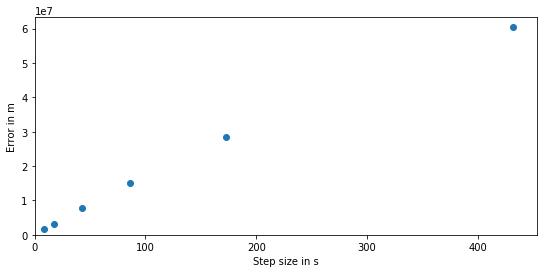

In [5]:
def calculate_error(num_steps):
    h = total_time / num_steps
    x = numpy.zeros([num_steps + 1, 2]) # m
    v = numpy.zeros([num_steps + 1, 2]) # m / s
    
    x[0, 0] = radius
    v[0, 1] = speed # [0, 1] because initial speed is going up (Y component) 
    
    for step in range(num_steps):
        x[step+1] = x[step] + h * v[step]
        v[step+1] = v[step] + h * acceleration(x[step])
    
    error = np.linalg.norm(x[num_steps] - x[0])
        
    # This is used for plotting
    h_array.append(h)
    error_array.append(error)
    return error
    
h_array=[]
error_array=[]
for num_steps in [200, 500, 1000, 2000, 5000, 10000]:
    error = calculate_error(num_steps)

@show_plot
def plot_me():
    axes = matplotlib.pyplot.gca()
    axes.set_xlabel('Step size in s')
    axes.set_ylabel('Error in m')
    matplotlib.pyplot.scatter(h_array, error_array)
    matplotlib.pyplot.xlim(left = 0.)
    matplotlib.pyplot.ylim(bottom = 0.)

plot_me()
